For better viewing experience, please visit the colab link : https://colab.research.google.com/drive/1rlA3alkkwKMSQFuxkLQ4Gm1OpDL3Ow_u

# **Not an ideal network**

In [0]:
#Installing Keras Library and importing the same.

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#Numpy is library used for efficient high level mathemtical processing on multi dimensional arrays
import numpy as np

# Keras provides a Sequential model API. This is way of creating a linear stack of layers while creating models.
from keras.models import Sequential

# Flatten provided by Keras will be used to convert a multidimensional tensor into a single 1-D tensor
from keras.layers import Flatten

# Convolution2D will be used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers import Convolution2D

# Import np_utils from keras
from keras.utils import np_utils

# Being a subset of NIST, MNIST has datasets of handwritten digits with 60,000 training set and 10,000 test set
from keras.datasets import mnist

In [0]:
# Loads MINST dataset, 60,000 training set and 10,000 test set
# X values will have images,  y values will have digit represented by the corresponding X images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


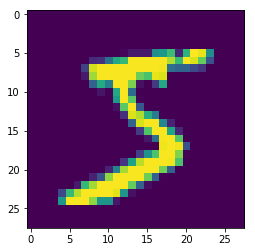

In [0]:
# Let's see a random image in a training dataset (X_train)
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Let's see corresponding y_train value
print(y_train[0])

5


In [0]:
# As you see above dimensions, loaded training dataset has a dimension of 2d. So, we have 60,000 2d images 28x28
# Let's reshapte to 3D as our model requires 3d images. Here, we are reshaping 28x28 to 28x28x1 where 1 being the channel of the image
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Using a 32 bit precision is a common approach in neural network training.
# Reason behind is that to make sure that the dataset fits easily in RAM.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the max pixel value in an image. Dividing all pixel values by 255 ensures that the input features are scaled between 0.0 and 1.0
# Reason behind to scale between 0.0 and 1.0 is to make sure default learning rate works well. Learning rate we will learn in upcoming sessions.
X_train /= 255
X_test /= 255

In [0]:
# Let's see what are the initial 10 values in y_train. Values is y_train corresponds to the digit represnted by x dataset images.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Reason behind this conversion is, at the end of the model we will be having 10 nodes which will tell, out of 0-9 digits which does the input image represent.
# Hence to learn as well as to evaluate, we need a 10 length array for each output label
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# After formatting, let's see how y labels look
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Importing activation as well as maxpooling which will be used in this model
from keras.layers import Activation, MaxPooling2D

# Initializing Sequential API as we will be creating model in a linear stack way
model = Sequential() 

# Input Dimension  = 28x28x1
# Kernel           = 3x3x1
# No:of Kernels    = 32
# Output Dimension = 26x26x32 (Here,32 is the number of channels)
# Receptive Field  = 3x3 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Input Dimension  = 26x26x32
# Kernel           = 3x3x32
# No:of Kernels    = 64
# Output Dimension = 24x24x64 (Here,64 is the number of channels)
# Receptive Field  = 5x5 
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Input Dimension  = 24x24x64
# Kernel           = 3x3x64
# No:of Kernels    = 128
# Output Dimension = 22x22x128 (Here,128 is the number of channels)
# Receptive Field  = 7x7 
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Input Dimension  = 22x22x128
# Maxpooling Dimension = 2x2
# Output Dimension = 11x11x128 (Here,128 is the number of channels)
# Receptive Field  = 14x14
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D(pool_size=(2, 2)))

# Input Dimension  = 11x11x128
# Kernel           = 3x3x128
# No:of Kernels    = 256
# Output Dimension = 9x9x256 (Here,256 is the number of channels)
# Receptive Field  = 16x16 
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Input Dimension  = 9x9x256
# Kernel           = 3x3x256
# No:of Kernels    = 512
# Output Dimension = 7x7x512 (Here,512 is the number of channels)
# Receptive Field  = 18x8 
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Input Dimension  = 7x7x512
# Kernel           = 3x3x512
# No:of Kernels    = 1024
# Output Dimension = 5x5x1024 (Here,1024 is the number of channels)
# Receptive Field  = 20x20 
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Input Dimension  = 5x5x1024
# Kernel           = 3x3x1024
# No:of Kernels    = 2048
# Output Dimension = 3x3x2048 (Here,2048 is the number of channels)
# Receptive Field  = 22x22 
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Input Dimension  = 3x3x2048
# Kernel           = 3x3x2048
# No:of Kernels    = 10
# Output Dimension = 1x1x10 (Here,10 is the number of channels)
# Receptive Field  = 24x24 
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Input Dimension  = 1x1x10
# Output Dimension = 10
model.add(Flatten())

# We use a “softmax” activation function in the output layer. 
# This is to ensure the output values are in the range of 0 and 1 and used as predicted probabilities.
model.add(Activation('softmax'))

# Let's see the overview of stacked up layers in the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `C

In [0]:
# Compiled the created model where we specify which loss function to use as well as optimizer. Both are used in backpropagation for training the model. 
# Metrics paramter specifies values to be evaluated by the model during training and testing
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Training the model
# Batch size is 32 so that every time, model takes 32 images in RAM and process it for learning. This number depends on how good our hardwar(RAM) is.
# nb_epoch is 10 which refers to the number of time model has to learn iteratively through the training dataset
# Verbose is made to 1 so that we can see the progress bar while training
# Reference : https://keras.io/models/model/
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.2553 - acc: 0.1237
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

In [0]:
# Evaluate the trained model on test dataset
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# Score represents the evaluation loss and accuracy
print(score)

[2.3025851249694824, 0.098]


In [0]:
# Using model to predict
y_pred = model.predict(X_test)

In [0]:
#Let's compare the predicted output and actual output
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


# Areas to Improve


*   **Receptive field** of the final layer is 24x24. So the final layer cannot see the whole image (28x28). Model should have had a receptive field of 28x28 at the final layer for a better accuracy
*   Model is inefficient interms of **no: of kernels** used. No: of kernels are shooting upto 2048 which does not guarantee any advantage and also increases **no: of parameters** too much. We could have stopped at 512 and then started from a lower number of kernels. Also we could have started with a lower number of kernels after Maxpooling, which increases gradually again, as we would have found edges and gradients after initial layers.
